###                       Análise de vendas em uma distribuidora de alimentos                                    

A distribuidora fica localizada no bairro da Caixa d'água, considerada um ponto centralizado na cidade de Salvador-BA, especializada em frutos do mar como peixes e mariscos. 

Análise foi feita das vendas do mês de fev/2022

Objetivo:

1- Identificar principais clientes/bairros de vendas

2- Quais são as formas de pagamentos mais usadas

2.1- Discriminando as compras por valores

3- Descobrir potenciais bairros para uma nova sede


In [64]:
import pandas as pd                        #importando as bibliotecas 
import matplotlib.pyplot as plt 
import numpy as np

fev = pd.read_csv('dataset/vendas_fev.csv', index_col = 0) #ler o arquivo csv da pasta dataset
fev.head() #imprimeindo as primeiras linhas 5 

,cliente,bairro,data,valor,pagamento
n,,,,,
15216,ELCI SANTOS SILVA,pituba,01/02/2022,151.68,dinheiro
15217,SHEILA ANDRADE,jardim apipema,01/02/2022,316.00,crédito
15218,PAULO DANTÃO,vitória,01/02/2022,109.80,crédito
15220,LUCAS CALMON FARIA,itaigara,01/02/2022,129.70,crédito
15221,RITA LUCIANA L DA SILVA,itapuã,01/02/2022,142.64,transferência


In [65]:
fev.info() #infos importantes sobre o df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 15216 to 15747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cliente    468 non-null    object 
 1   bairro     468 non-null    object 
 2   data       468 non-null    object 
 3   valor      468 non-null    float64
 4   pagamento  468 non-null    object 
dtypes: float64(1), object(4)
memory usage: 21.9+ KB


In [66]:
fev.describe() #outras importantes sobre o df

,valor
count,468.000000
mean,176.902115
std,104.150730
min,11.800000
25%,104.587500
50%,145.000000
75%,227.527500
max,663.610000


In [67]:
fev.columns = fev.columns.str.upper()     #nomes das colunas em maiúsculo
fev.head(10)

,CLIENTE,BAIRRO,DATA,VALOR,PAGAMENTO
n,,,,,
15216,ELCI SANTOS SILVA,pituba,01/02/2022,151.68,dinheiro
15217,SHEILA ANDRADE,jardim apipema,01/02/2022,316.00,crédito
15218,PAULO DANTÃO,vitória,01/02/2022,109.80,crédito
15220,LUCAS CALMON FARIA,itaigara,01/02/2022,129.70,crédito
15221,RITA LUCIANA L DA SILVA,itapuã,01/02/2022,142.64,transferência
15222,FABIANA RODRIGUES,itaigara,01/02/2022,231.46,dinheiro
15224,MARCELO HEMIDA,centro - lauro,01/02/2022,347.00,crédito
15226,JOANA SOUSA,pituba,01/02/2022,124.80,transferência
15227,JANE JULIA ARAUJO,patamares,01/02/2022,180.00,dinheiro


In [68]:
# número total de bairros distintos 

print('Numero total de vendas em bairros diferentes: {0}'.format(fev['BAIRRO'].nunique()))
print(fev['BAIRRO'].value_counts().head(10))
print('--'*40)
         
    


Numero total de vendas em bairros diferentes: 71
pituba                 53
itaigara               42
patamares              32
caminho das arvores    22
rio vermelho           20
horto florestal        19
graça                  18
brotas                 16
jardim apipema         14
federação              13
Name: BAIRRO, dtype: int64
--------------------------------------------------------------------------------


In [69]:
qt_vendas_cliente = fev['CLIENTE'].value_counts() #separando uma lista somente com os clientes
qt_vendas_cliente.head(10)
print('--'*40)

--------------------------------------------------------------------------------


In [70]:
qt_pagamentos = fev['PAGAMENTO'].value_counts().head(10)
print(qt_pagamentos)
print('--'*40)
         

crédito          227
transferência    197
dinheiro          23
débito            21
Name: PAGAMENTO, dtype: int64
--------------------------------------------------------------------------------


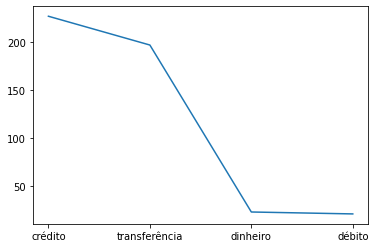

In [71]:
plt.plot(qt_pagamentos)

In [72]:
#Discriminar cada tipo de compra em sub-categorias

lista_condicional = [
    (fev['VALOR'] >= 300),
    (fev['VALOR'] >= 225),
    (fev['VALOR'] >= 150),
    (fev['VALOR'] >= 75),
    (fev['VALOR'] >= 0)]
lista_deci = ['Grande', 'Grande-Média','Média','Média-Pequena','Pequena']
fev['DESCRIÇÃO'] = np.select(lista_condicional, lista_deci, default='Not Specified')
fev


,CLIENTE,BAIRRO,DATA,VALOR,PAGAMENTO,DESCRIÇÃO
n,,,,,,
15216,ELCI SANTOS SILVA,pituba,01/02/2022,151.68,dinheiro,Média
15217,SHEILA ANDRADE,jardim apipema,01/02/2022,316.00,crédito,Grande
15218,PAULO DANTÃO,vitória,01/02/2022,109.80,crédito,Média-Pequena
15220,LUCAS CALMON FARIA,itaigara,01/02/2022,129.70,crédito,Média-Pequena
15221,RITA LUCIANA L DA SILVA,itapuã,01/02/2022,142.64,transferência,Média-Pequena
...,...,...,...,...,...,...
15743,ANA PAULA MACEDO ALVES DA SILVEIRA,imbui,26/02/2022,83.80,crédito,Média-Pequena
15744,ENIVALDO ANTÔNIO DE SOUZA,horto bela vista,26/02/2022,120.70,crédito,Média-Pequena
15745,EMÍLIA MOREIRA,armação,26/02/2022,536.25,crédito,Grande


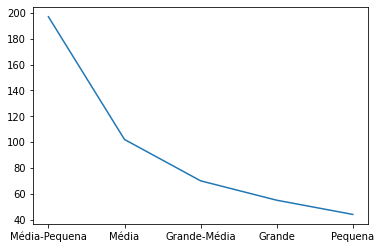

In [78]:
#
abc = fev['DESCRIÇÃO'].value_counts().head(10)
plt.plot(abc)